In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

In [ ]:
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, loc = 2.5, size=cantidad, random_state = 0)
    aleatorios = aleatorios + abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [ ]:
edades = datos_sesgados(3, 100000, 62)

In [ ]:
edades

array([38.8, 33.5, 34.2, ..., 34.3, 38.1, 37.4])

In [ ]:
edades.min()

np.float64(19.5)

In [ ]:
edades.max()

np.float64(62.0)

In [ ]:
#Muestra

tamaño_muestra = 100
muestra =np.random.choice(edades, tamaño_muestra)
muestra

array([31.5, 34.2, 34.4, 31.1, 34.1, 35.7, 32.9, 40. , 29.1, 36.2, 36.4,
       30.3, 37.8, 31.8, 39.9, 29.9, 28.2, 31.1, 39.2, 41. , 26.7, 31.1,
       27.8, 33.7, 28.3, 35.2, 40.4, 30.7, 34. , 29.2, 42.6, 33.3, 36.1,
       29.7, 31.1, 37.3, 35.1, 36.3, 36.5, 39.9, 30. , 39.1, 37.9, 32.3,
       40.2, 34.2, 36.5, 33.6, 29.2, 45.2, 32.4, 41.9, 36.5, 38.1, 30.7,
       32.9, 33. , 32.1, 31.1, 32.6, 33.1, 32.9, 33.9, 25.9, 25.1, 35.5,
       47.5, 42.5, 33.2, 28.7, 29.3, 34.7, 32.8, 41.9, 36.2, 34.7, 32. ,
       43.8, 33.3, 36.1, 37.7, 35.7, 29. , 42. , 43.8, 30.6, 33.3, 34.2,
       37.6, 37.2, 30.3, 30.6, 30.8, 30.8, 31.4, 29.8, 25.8, 35.3, 34.5,
       29. ])

In [ ]:
from os import replace
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(edades, tamaño_muestra, replace = False))

muestras_generadas = muestras_generadas.reshape(-1,tamaño_muestra )
muestras_generadas

array([[30.8, 32.3, 29.8, ..., 37.1, 30.6, 33.4],
       [34.2, 39.4, 39.6, ..., 39.8, 29.8, 32.7],
       [35.9, 23.5, 40.2, ..., 29.3, 29.5, 40.3],
       ...,
       [32.8, 28.5, 26.5, ..., 32.6, 30.6, 35.1],
       [29.2, 26.3, 30.2, ..., 32.1, 30.7, 33.5],
       [30.6, 27.3, 28.5, ..., 37.3, 33.7, 32.4]])

In [ ]:
muestras_generadas.shape

(1000, 100)

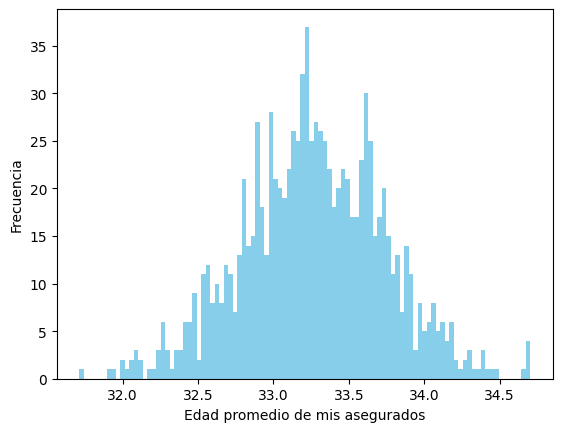

In [ ]:
plt.hist(muestras_generadas.mean(axis=1), bins=100, color="skyblue")
plt.xlabel("Edad promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#Intervalo de confianza

int_confianza =np.quantile(muestras_generadas.mean(axis=1), [0.025, 0.975])

In [ ]:
int_confianza

array([32.28985 , 34.171025])

In [ ]:
promedios_muestras = muestras_generadas.mean(axis=1)
media = promedios_muestras.mean()
media

np.float64(33.262337)

In [ ]:
q_025 = np.quantile(promedios_muestras, 0.025)
q_025

np.float64(32.28985000000001)

In [ ]:
q_975 = np.quantile(promedios_muestras, 0.975)
q_975

np.float64(34.17102500000001)

In [ ]:
media_inicial = muestra.mean()
media_inicial

np.float64(32.38399999999999)

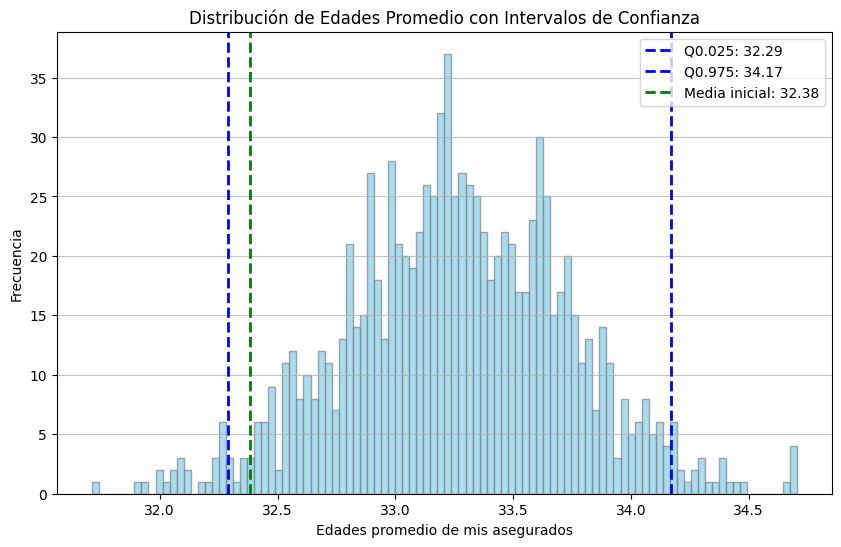

In [ ]:
# Crear el histograma y agregar las líneas de los cuantiles y la media
plt.figure(figsize=(10, 6))
plt.hist(promedios_muestras, bins=100, color="skyblue", edgecolor='gray', alpha=0.7)
# plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(q_025, color='blue', linestyle='--', linewidth=2, label=f'Q0.025: {q_025:.2f}')
plt.axvline(q_975, color='blue', linestyle='--', linewidth=2, label=f'Q0.975: {q_975:.2f}')
plt.axvline(media_inicial, color='green', linestyle='--', linewidth=2, label=f'Media inicial: {media_inicial:.2f}')

# Añadir etiquetas y leyenda
plt.xlabel("Edades promedio de mis asegurados")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades Promedio con Intervalos de Confianza")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


#Ejercicio Bitcoin

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
Ticker = "BTC-USD"
Start_Date = "2023-10-18"
End_Date  = "2024-10-18"
data = yf.download(Ticker, Start_Date, End_Date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-10-18,28328.341797,28889.009766,28174.251953,28413.531250,12724128586
2023-10-19,28719.806641,28892.474609,28177.988281,28332.416016,14448058195
2023-10-20,29682.949219,30104.085938,28601.669922,28732.812500,21536125230
2023-10-21,29918.412109,30287.482422,29481.751953,29683.380859,11541146996
2023-10-22,29993.896484,30199.433594,29720.312500,29918.654297,10446520040


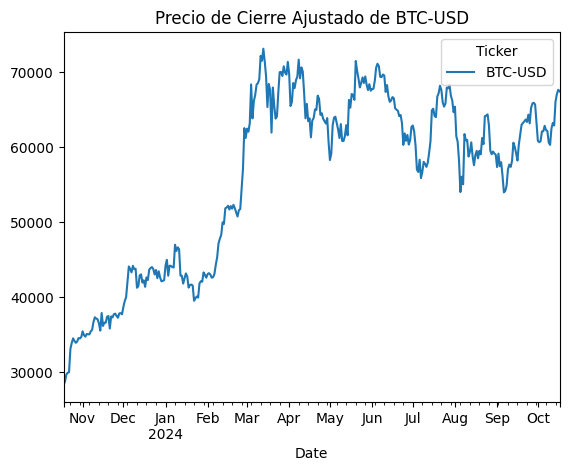

In [ ]:
data['Close'].plot(title=f"Precio de Cierre Ajustado de {Ticker}")
plt.show()

In [ ]:
datos = pd.DataFrame(data['Close'])
datos

Ticker,BTC-USD
Date,
2023-10-18,28328.341797
2023-10-19,28719.806641
2023-10-20,29682.949219
2023-10-21,29918.412109
2023-10-22,29993.896484
...,...
2024-10-13,62851.375000
2024-10-14,66046.125000
2024-10-15,67041.109375


In [ ]:
datos.columns

Index(['BTC-USD'], dtype='object', name='Ticker')

In [ ]:
datos['Log_Return'] = np.log(datos['BTC-USD'] / datos['BTC-USD'].shift(-1))
datos

Ticker,BTC-USD,Log_Return
Date,,
2023-10-18,28328.341797,-0.013724
2023-10-19,28719.806641,-0.032986
2023-10-20,29682.949219,-0.007901
2023-10-21,29918.412109,-0.002520
2023-10-22,29993.896484,-0.098123
...,...,...
2024-10-13,62851.375000,-0.049581
2024-10-14,66046.125000,-0.014953
2024-10-15,67041.109375,-0.008490


In [ ]:
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos

Ticker,BTC-USD,Log_Return
Date,,
2024-10-17,67399.835938,0.000000
2024-10-16,67612.718750,0.003154
2024-10-15,67041.109375,-0.008490
2024-10-14,66046.125000,-0.014953
2024-10-13,62851.375000,-0.049581
...,...,...
2023-10-22,29993.896484,-0.098123
2023-10-21,29918.412109,-0.002520
2023-10-20,29682.949219,-0.007901


In [ ]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra

,Log_Return
Date,
2024-10-17,0.000000
2024-10-16,0.003154
2024-10-15,-0.008490
2024-10-14,-0.014953
2024-10-13,-0.049581
...,...
2024-07-14,-0.064999
2024-07-13,-0.025928
2024-07-12,-0.022753


In [ ]:
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas

array([[ 0.01687024, -0.03598749, -0.0039966 , ...,  0.00931261,
        -0.0031893 ,  0.07363199],
       [-0.00208609,  0.00502307, -0.06499862, ...,  0.01354163,
        -0.00107858,  0.07363199],
       [ 0.0014548 , -0.03571709, -0.00349313, ..., -0.0135767 ,
         0.07363199, -0.11461586],
       ...,
       [ 0.00383726,  0.00804021,  0.00315353, ...,  0.00931261,
         0.00690925, -0.05966668],
       [ 0.04315788, -0.02592785, -0.00962398, ..., -0.00208609,
        -0.00849011, -0.00988184],
       [ 0.00531411, -0.0107566 ,  0.        , ..., -0.03894551,
        -0.00936755,  0.02885744]])

In [ ]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[-0.00107858,  0.0014548 , -0.01523424, -0.00988184, -0.03537848,
        -0.0107566 , -0.00849011,  0.01305211,  0.00253331, -0.03193999,
        -0.00962398, -0.04958055,  0.00838777,  0.00509037, -0.00400401,
        -0.03193999, -0.00650453,  0.03576248, -0.03894551,  0.01813195,
        -0.0107566 , -0.00353292,  0.00502307, -0.03894551,  0.0084622 ,
         0.01687495,  0.0084622 ,  0.01354163, -0.01495264,  0.05519288,
         0.00453479,  0.00930535,  0.00225971, -0.0119063 , -0.03069673,
        -0.00849011,  0.00542109, -0.11461586,  0.00804021, -0.01288091,
        -0.0135767 , -0.01711366,  0.00939129,  0.01687495, -0.01711366,
         0.00930535, -0.02199433,  0.02828177,  0.01687024,  0.00811202,
         0.03173873, -0.0116727 ,  0.00168357,  0.00531411,  0.01818596,
         0.01354163, -0.03069673,  0.02885744, -0.06499862,  0.        ,
        -0.03176403,  0.00253331,  0.00811202, -0.00650453,  0.01203949,
        -0.00930963,  0.02885744,  0.01354163,  0.0

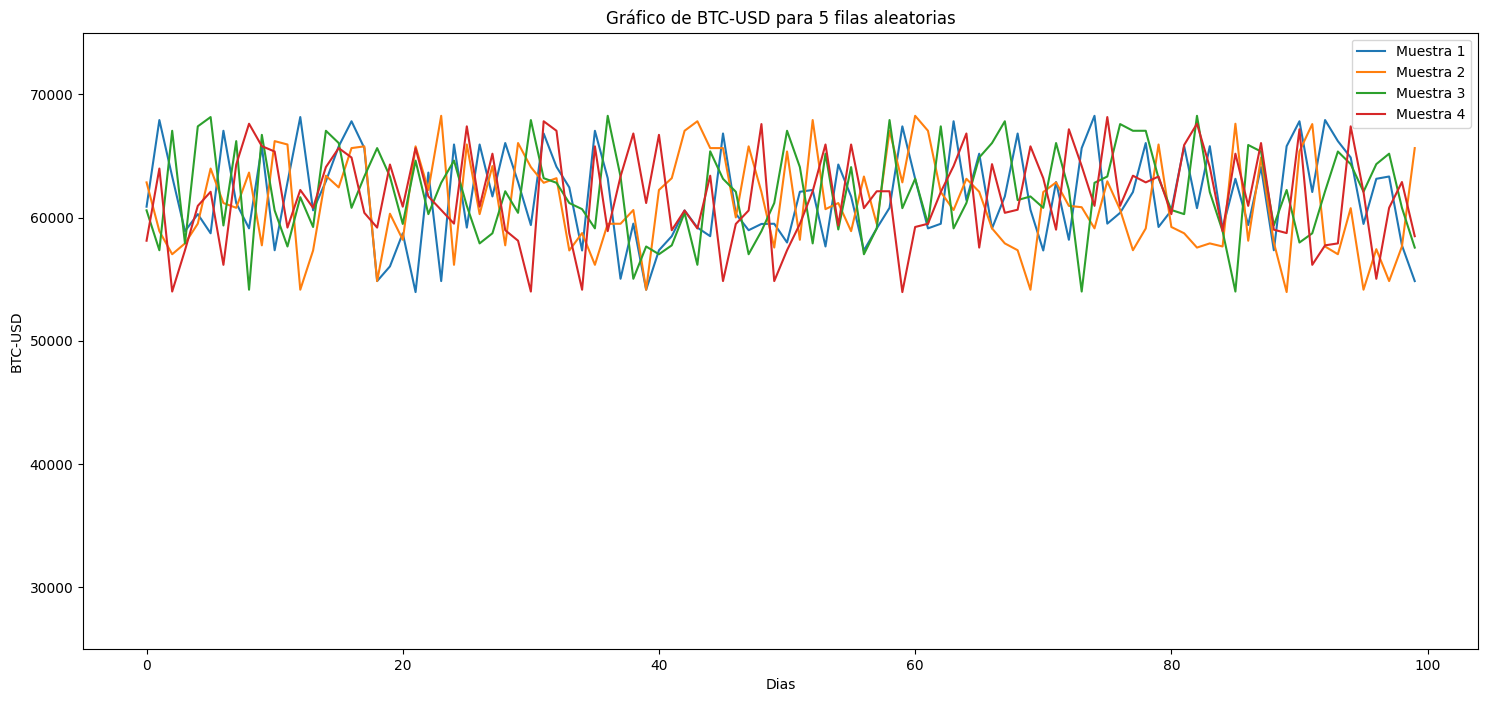

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['BTC-USD'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(25000, 75000)
plt.title('Gráfico de BTC-USD para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('BTC-USD')
plt.legend()
plt.show()

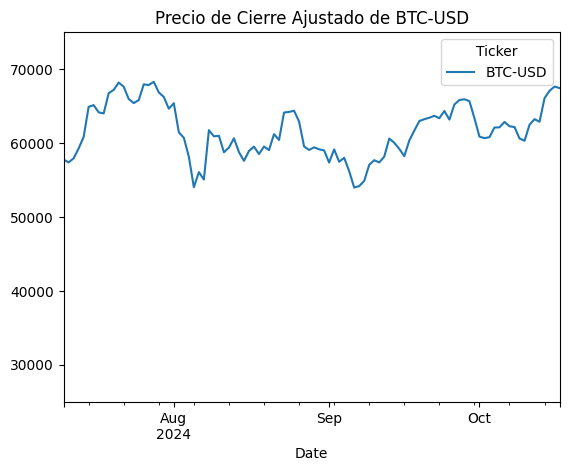

In [ ]:
# Graficar solo los últimos 100 datos de 'Adj Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierre Ajustado de {Ticker}")

# Mostrar el gráfico
plt.ylim(25000, 75000)
plt.show()

#Ejercicio NVDA

[*********************100%***********************]  1 of 1 completed


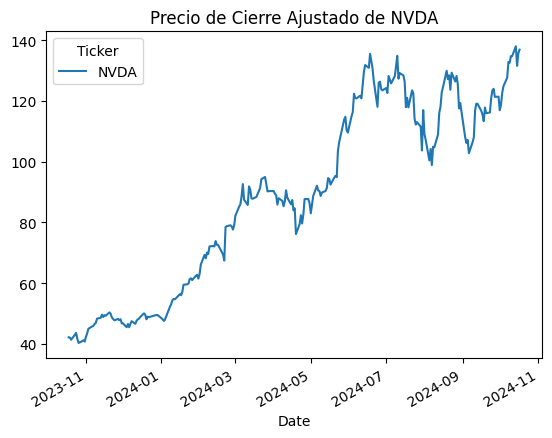

In [ ]:
Ticker = "NVDA"
Start_Date = "2023-10-18"
End_Date  = "2024-10-18"
data = yf.download(Ticker, Start_Date, End_Date)
data.head()
data['Close'].plot(title=f"Precio de Cierre Ajustado de {Ticker}")
plt.show()


In [ ]:
datos = pd.DataFrame(data['Close'])
datos


Ticker,NVDA
Date,
2023-10-18,42.176453
2023-10-19,42.081497
2023-10-20,41.367828
2023-10-23,42.955090
2023-10-24,43.642773
...,...
2024-10-11,134.778320
2024-10-14,138.047806
2024-10-15,131.578842


In [ ]:
datos.columns
datos['Log_Return'] = np.log(datos['NVDA'] / datos['NVDA'].shift(-1))
datos
datos_invertidos = datos[::-1].fillna(0)
datos_invertidos


Ticker,NVDA,Log_Return
Date,,
2024-10-17,136.907974,0.000000
2024-10-16,135.698166,-0.008876
2024-10-15,131.578842,-0.030827
2024-10-14,138.047806,0.047994
2024-10-11,134.778320,-0.023969
...,...,...
2023-10-24,43.642773,0.044107
2023-10-23,42.955090,-0.015883
2023-10-20,41.367828,-0.037652


In [ ]:
# Muestra
import random
#tamano_muestra = random.randint(1, 365)
tamano_muestra = 100
muestra = datos_invertidos['Log_Return'].head(tamano_muestra)
muestra
muestras_generadas = np.array([])
num_muestras = 1000
for i in range(num_muestras):
    muestras_generadas = np.append(muestras_generadas, np.random.choice(muestra, tamano_muestra, replace = True))

muestras_generadas = muestras_generadas.reshape(-1, tamano_muestra)
muestras_generadas


array([[-4.64737144e-02, -7.43368311e-03, -3.71317793e-02, ...,
         7.30399947e-02, -1.86596299e-02, -8.87592841e-03],
       [ 6.91790647e-02, -1.44453346e-02,  9.09444694e-04, ...,
        -3.31019268e-02, -8.87592841e-03,  6.59779049e-02],
       [-1.20553378e-01,  7.71955368e-03, -6.53794305e-02, ...,
        -1.50239360e-02,  1.73932638e-02, -2.59341269e-02],
       ...,
       [-6.13305891e-03, -2.59341269e-02,  2.15131888e-02, ...,
         7.71955368e-03,  6.59779049e-02,  1.80774019e-03],
       [-1.61523022e-02,  7.40391971e-05,  1.32002546e-02, ...,
        -2.16065728e-02, -3.71317793e-02,  2.11894731e-02],
       [ 5.72761905e-02, -5.02707103e-02,  1.63269180e-02, ...,
         1.30871869e-02,  1.93926395e-02,  3.60453141e-02]])

In [ ]:
# Seleccionar 4 índices aleatorios entre 0 y 999
indices_aleatorios = np.random.choice(muestras_generadas.shape[0], size=4, replace=False)

# Obtener las 4 filas aleatorias
filas_aleatorias  = muestras_generadas[indices_aleatorios]
filas_aleatorias

array([[ 0.00000000e+00, -3.29369869e-04,  1.93926395e-02,
        -2.23892121e-03, -3.88864787e-02, -5.94642013e-02,
         1.67129558e-02,  1.32002546e-02, -9.37128258e-03,
        -3.88864787e-02, -1.43395120e-02, -3.71317793e-02,
        -1.43395120e-02,  3.60453141e-02, -1.89804005e-02,
        -4.28197058e-03, -8.87592841e-03,  0.00000000e+00,
         9.09444694e-04, -1.39025042e-02,  1.79237529e-02,
         2.15131888e-02,  1.67129558e-02, -4.25864187e-02,
        -1.24182522e-02,  6.85350800e-02, -1.67094093e-02,
        -1.65660641e-02,  1.32002546e-02,  2.13808432e-02,
        -9.77538985e-03, -2.65139906e-02, -6.92283432e-03,
         3.63587358e-03,  6.91790647e-02,  1.96716467e-02,
        -9.37128258e-03,  1.00096722e-01, -8.87592841e-03,
         2.27504315e-02,  7.40391971e-05, -2.39686869e-02,
         3.63587358e-03, -2.45025632e-02,  2.15131888e-02,
         2.11894731e-02, -2.45025632e-02,  1.32002546e-02,
         4.79938118e-02,  6.91790647e-02,  1.96716467e-0

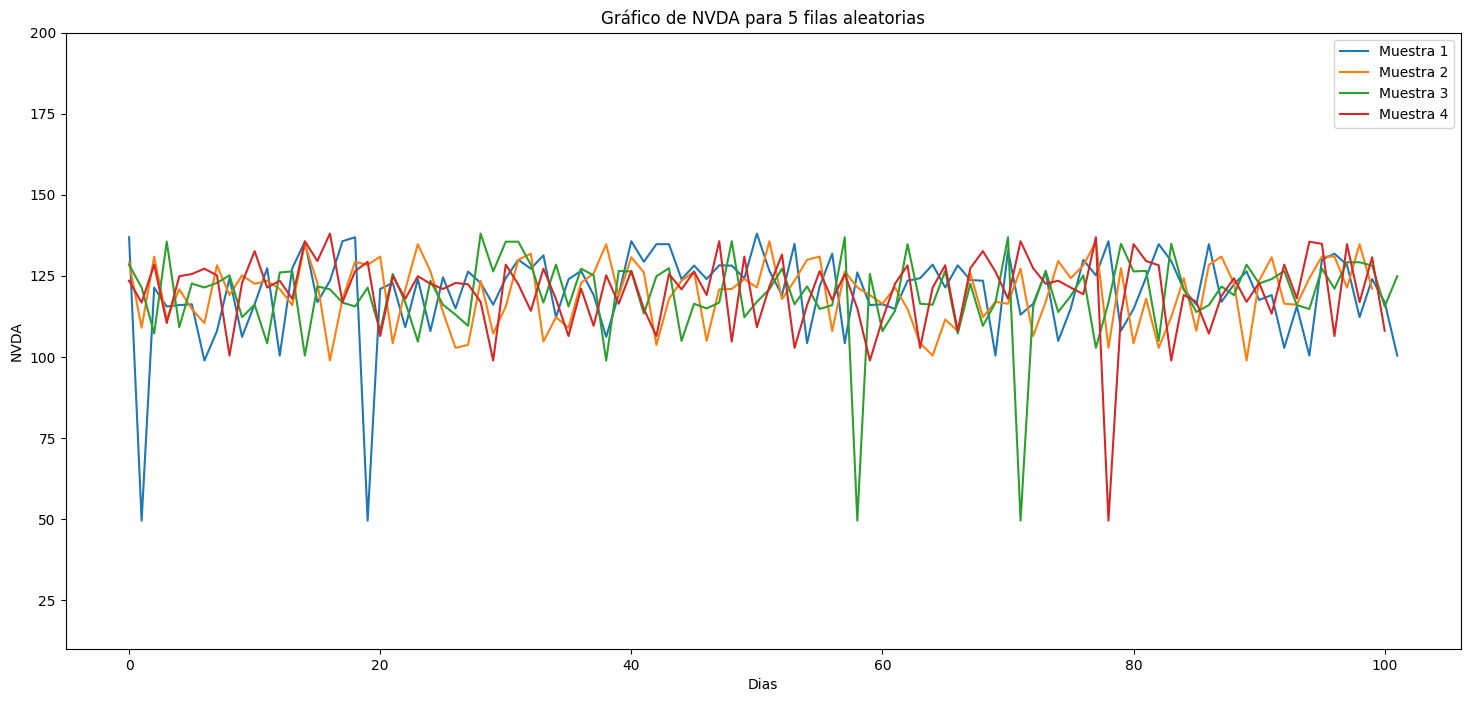

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(18, 8))

# Iterar sobre las filas aleatorias y graficarlas
for i in range(4):
    # Crear el DataFrame para la fila aleatoria
    tabla = pd.DataFrame(filas_aleatorias[i], columns=['Log_Return'])

    # Realizar el merge con datos_invertidos
    resultado = pd.merge(tabla, datos_invertidos, left_on='Log_Return', right_on='Log_Return', how='left')

    # Graficar la serie 'BTC-USD' resultante con un color diferente
    plt.plot(resultado['NVDA'], label=f'Muestra {i+1}')  # Etiqueta cada línea con su índice

# Añadir título y leyenda
plt.ylim(10, 200)
plt.title('Gráfico de NVDA para 5 filas aleatorias')
plt.xlabel('Dias')
plt.ylabel('NVDA')
plt.legend()
plt.show()

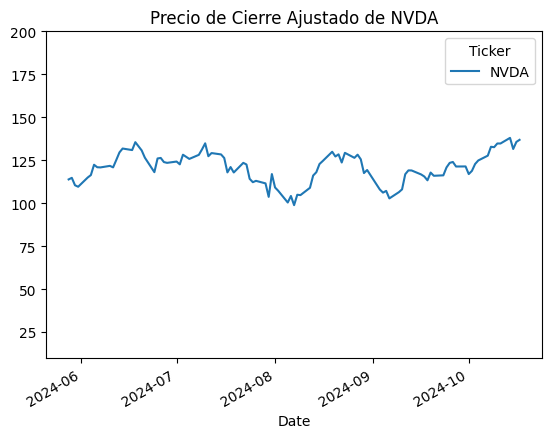

In [ ]:
# Graficar solo los últimos 100 datos de 'Adj Close'
data['Close'].iloc[-100:].plot(title=f"Precio de Cierre Ajustado de {Ticker}")

# Mostrar el gráfico
plt.ylim(10, 200)
plt.show()